# iMobile Images

In [1]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import shutil

In [2]:
def img_to_text(img):
    neft_string = pytesseract.image_to_string(img)
    return neft_string

In [3]:
def img_read(img_path,img):
    img1= cv2.imread(img_path+img)
    img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
    img1 = cv2.threshold(img1,0,255,cv2.THRESH_OTSU)[1]
    return img1

In [4]:
img_path = 'Images/iMobile/'
img_list = os.listdir(img_path)

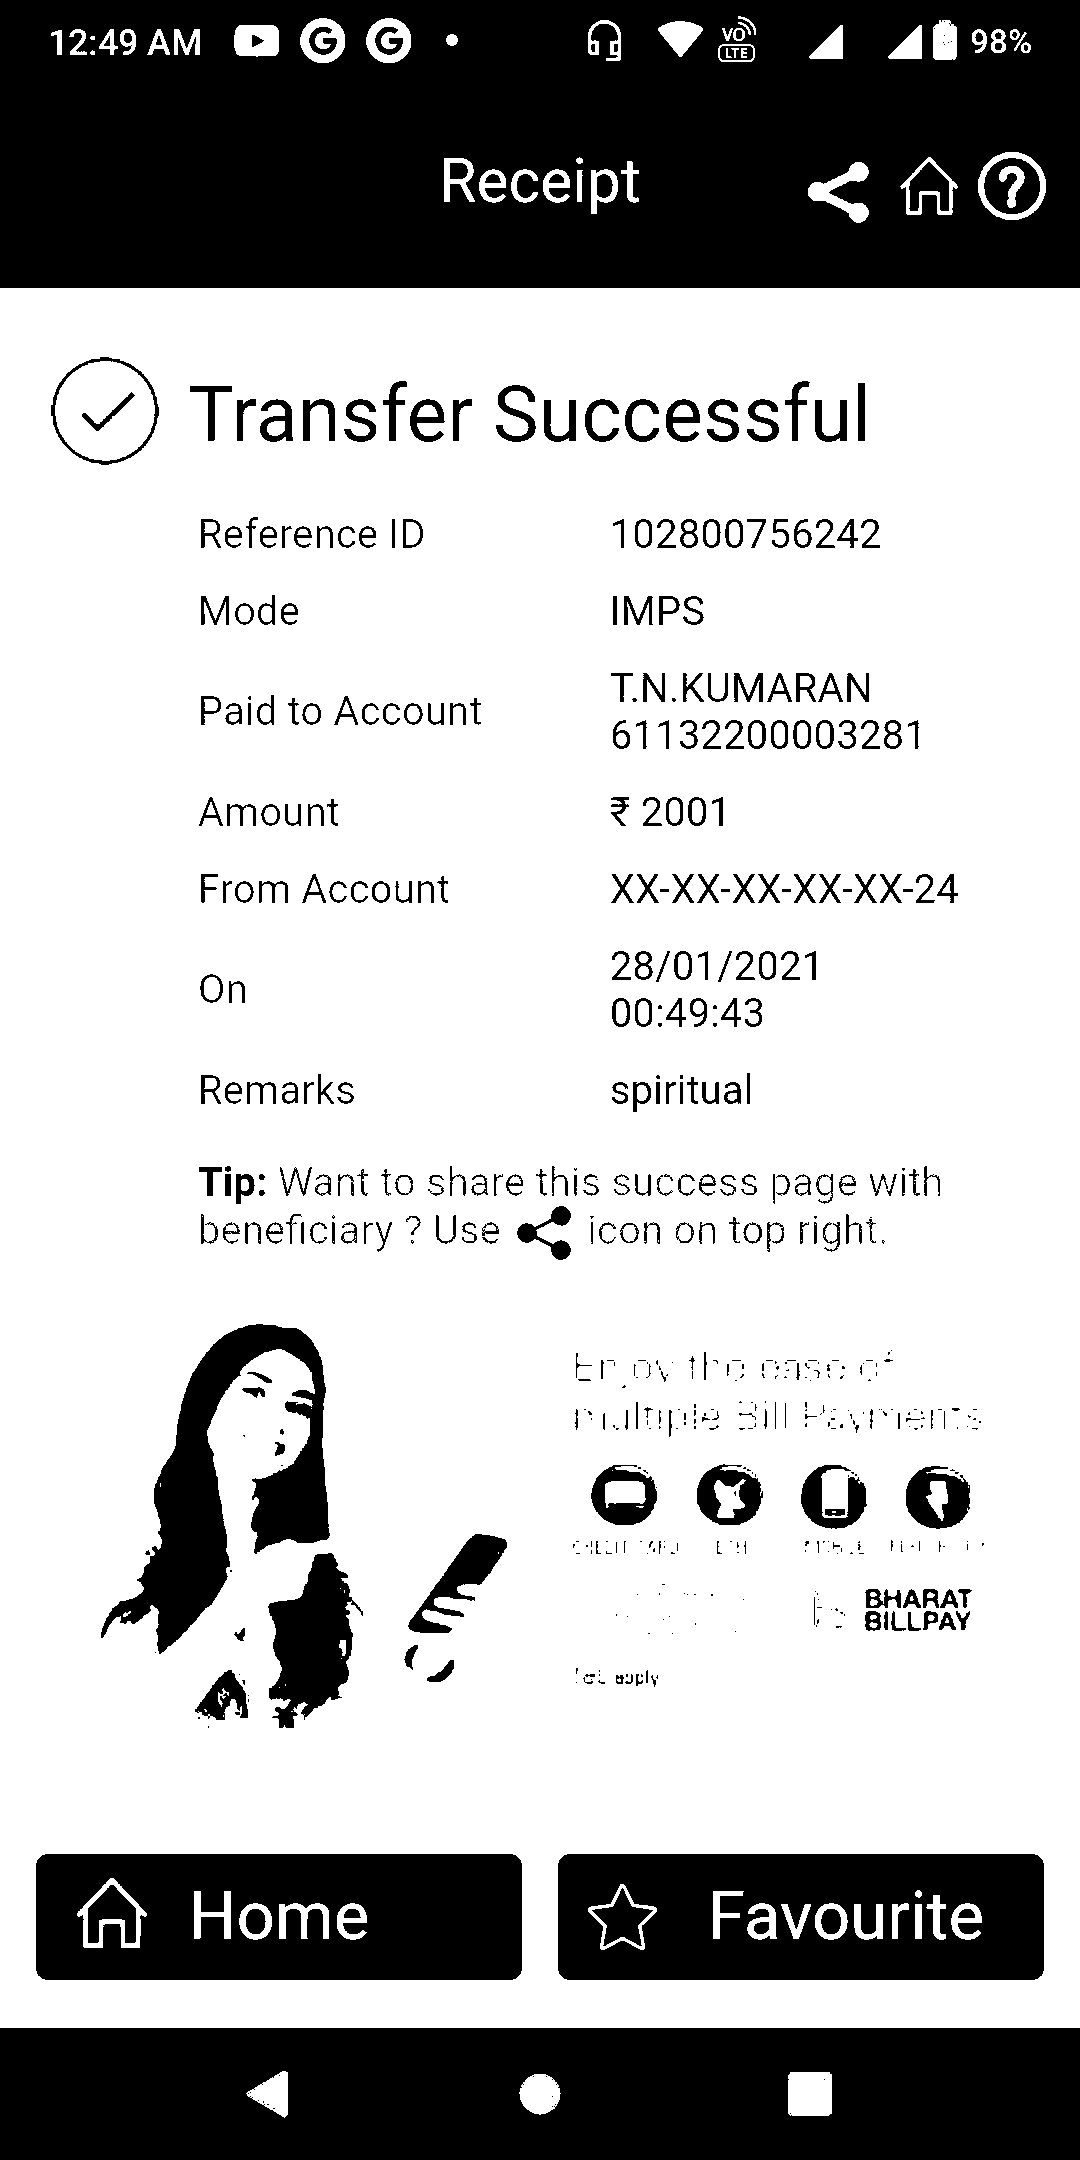

In [5]:
img = img_read(img_path,img_list[0])
Image.fromarray(img)

In [6]:
import pytesseract
import re

In [7]:
imobile_string = img_to_text(img)
imobile_string

'12:49AM @BO@- er 2 Ge | ee\n\nTeton << A®\n\n \n\nVv) Transfer Successful\n\nReference ID 102800756242\nMode IMPS\n\n. T.N.KUMARAN\nPaid to Account 61132200003281\nAmount = 2001\nFrom Account XX-XX-XX-XX-XX-24\n\n28/01/2021\n\nOn 00:49:43\nRemarks spiritual\n\nTip: Want to share this success page with\nbeneficiary ? Use < icon on top right.\n\nEr oy tho oase a\nrialtypie Sal Peeyerents\n2 ooo\nTROL ABA L Koi biel koi\nb> BittBay\nCy "eh aaply\n\n \n\x0c'

In [8]:
imob_split = imobile_string.split('\n')

In [9]:
def extract_imobile_text(imobile_string,imob_split):
    vals = []
    vals.append(re.findall('Reference ID \d{0,5000}',imobile_string)[0])
    vals.append(re.findall('XX-XX-XX-XX-XX-\d{0,2}',imobile_string)[0])
    vals.append(re.findall('Paid to Account \d{0,5000}',imobile_string)[0])
    vals.append(re.findall('Amount = \d{0,5000}',imobile_string)[0])
    vals.append(re.findall('\d{0,2}/\d{0,2}/\d{0,2}',imobile_string)[0])

    Beneficiary_Name = [imob_split[i-1] for i in range(len(imob_split)) if len(re.findall('Paid to Account',imob_split[i]))==1][0]
    vals.append(Beneficiary_Name)

    remarks = [imob_split[i]for i in range(len(imob_split)) if len(re.findall('Remarks',imob_split[i]))==1][0]
    vals.append(remarks)
    return vals

iMobile_extracted = extract_imobile_text(imobile_string,imob_split)

pd.DataFrame(iMobile_extracted).T

,0,1,2,3,4,5,6
0,Reference ID 102800756242,XX-XX-XX-XX-XX-24,Paid to Account 61132200003281,Amount = 2001,28/01/20,. T.N.KUMARAN,Remarks spiritual


In [10]:
#Creating a for loop  for all images

In [11]:
img_path = 'Images/iMobile/'
img_list = os.listdir(img_path)

In [12]:
iMobile_df = pd.DataFrame()
for i in range(len(img_list)):
    img = img_read(img_path,img_list[i])
    imobile_string = img_to_text(img)
    imob_split = imobile_string.split('\n')
    iMobile_extracted = pd.DataFrame(extract_imobile_text(imobile_string,imob_split)).T
    iMobile_df = pd.concat([iMobile_df,iMobile_extracted],axis = 0)

In [13]:
mapper = dict(zip(list(range(7)),['id','Payee AC No.','Sent to Ac no.','Amount_Sent','Date','Name_Receiver','Remarks']))
iMobile_df = iMobile_df.rename(columns = mapper)
iMobile_df.to_excel('Docs/iMobile_mobile_tx.xlsx',index = False)
iMobile_df

,id,Payee AC No.,Sent to Ac no.,Amount_Sent,Date,Name_Receiver,Remarks
0,Reference ID 102800756242,XX-XX-XX-XX-XX-24,Paid to Account 61132200003281,Amount = 2001,28/01/20,. T.N.KUMARAN,Remarks spiritual


# Mobile Transfer

In [14]:
img_path1 = 'Images/Mobile_NEFT/'
img_list1 = os.listdir(img_path1)

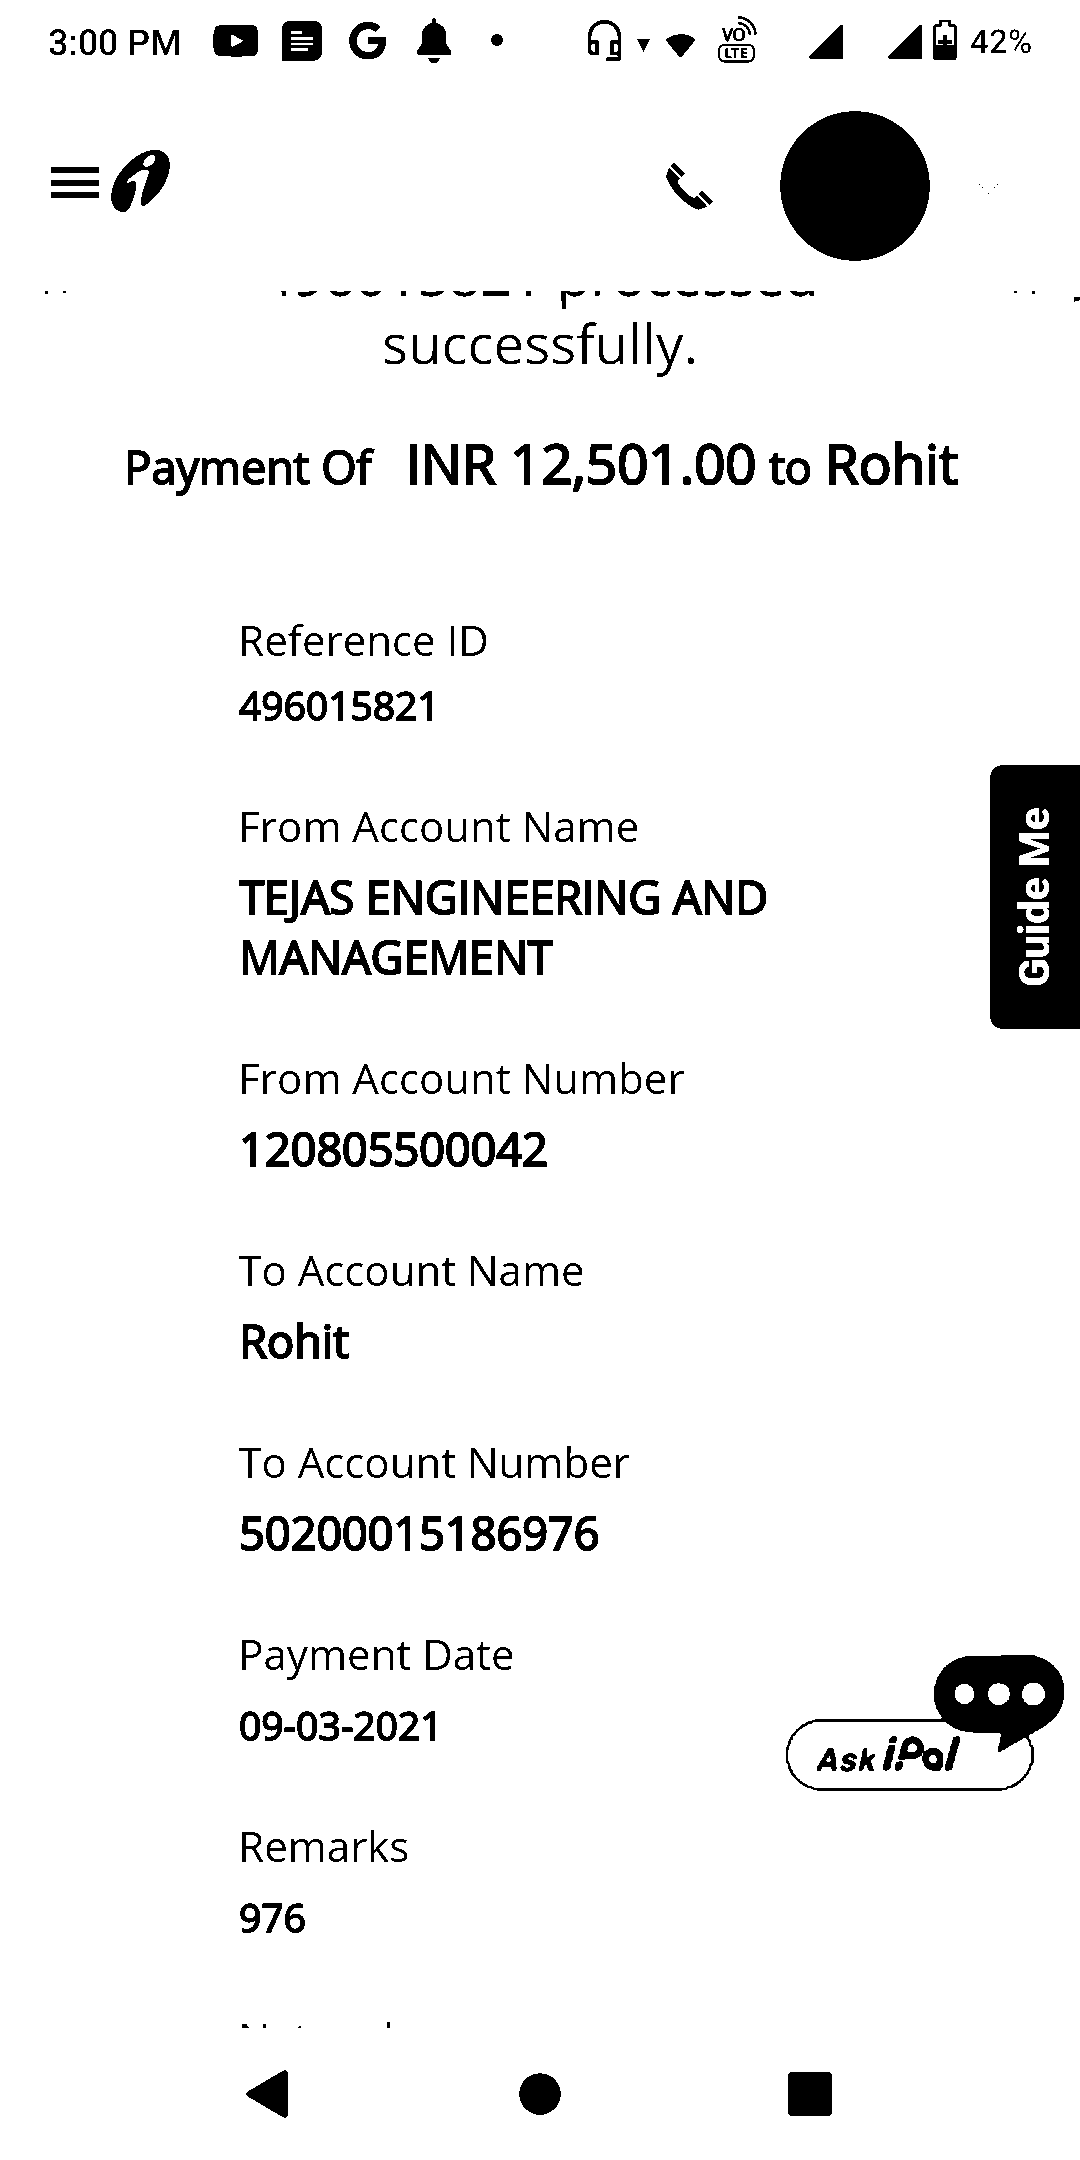

In [15]:
img1 = img_read(img_path1,img_list1[0])
Image.fromarray(img1)

In [16]:
neft_string = img_to_text(img1)
neft_string_split = neft_string.split('\n')

In [17]:
neft_string

'3:00PM @ BGA: ve 4 442%\n\nfewer wwe op errr\n\n \n\nsuccessfully.\nPayment Of INR 12,501.00 to Rohit\nReference ID\n496015821\n\nFrom Account Name\n\nTEJAS ENGINEERING AND\nMANAGEMENT\n\nFrom Account Number\n120805500042\n\nTo Account Name\nRohit\n\nTo Account Number\n\n50200015186976\nPayment Date\neee\n09-03-2021\nAsk iPol\nRemarks\n976\n\n< @ a\n\x0c'

In [18]:
#Amt Transfered
def extract_neft_text(neft_string_split,neft_string):
    vals = []
    ref_id = re.findall('Reference ID\n\d{0,20}',neft_string)[0]
    vals.append(ref_id)
    date = re.findall('\d{0,2}-\d{0,2}-\d{0,4}',neft_string)[0]
    vals.append(date)
    amt_trans = [neft_string_split[i] for i in range(len(neft_string_split)) if len(re.findall('INR',neft_string_split[i]))>0]
    vals.append(amt_trans[0])
    payment_to = [neft_string_split[i+1] for i in range(len(neft_string_split)) if len(re.findall('INR',neft_string_split[i]))>0]
    vals.append(payment_to[0])
    payment_from = [neft_string_split[i+2:i+5] for i in range(len(neft_string_split)) if len(re.findall('From Account Name',neft_string_split[i]))>0][0]
    vals.append(payment_from)
    from_ac_no = re.findall('From Account Number\n\d{0,5000}',neft_string)[0].split('\n')[1]
    vals.append(from_ac_no)
    to_ac_name = [neft_string_split[i+1:i+3] for i in range(len(neft_string_split)) if len(re.findall('To Account Name',neft_string_split[i]))>0][0]
    vals.append(to_ac_name)
    to_ac_no = [neft_string_split[i-3:i] for i in range(len(neft_string_split)) if len(re.findall('Payment Date',neft_string_split[i]))>0][0]
    vals.append(to_ac_no)
    
    return vals


In [19]:
neft_extracted = extract_neft_text(neft_string_split,neft_string)
pd.DataFrame(neft_extracted).T

,0,1,2,3,4,5,6,7
0,Reference ID\n496015821,09-03-2021,"Payment Of INR 12,501.00 to Rohit",Reference ID,"[TEJAS ENGINEERING AND, MANAGEMENT, ]",120805500042,"[Rohit, ]","[To Account Number, , 50200015186976]"


In [20]:
img_path1 = 'Images/Mobile_NEFT/'
img_list1 = os.listdir(img_path1)
z = 0
neft_df = pd.DataFrame()
for i in range(len(img_list1)):
    try:
        img1 = img_read(img_path1,img_list1[i])
        neft_string = img_to_text(img1)
        neft_string_split = neft_string.split('\n')
        neft_extracted = pd.DataFrame(extract_neft_text(neft_string_split,neft_string)).T
        neft_df = pd.concat([neft_df,neft_extracted],axis = 0)
    except:
        z+=1
        src = img_path1+img_list1[i]
        dst = 'Failed Detection/NEFT'
        shutil.copy(src,dst)
print('We failed to read {} images since they are either having a different format from previous years.'.format(z))

We failed to read 31 images since they are either having a different format from previous years.


In [21]:
mapper = dict(zip(list(range(8)),['id','date','payment','receiver name.','Sender Name.','Sender AC No.','Name_Receiver','Receiver_AC_No']))
neft_df = neft_df.rename(columns = mapper)

In [22]:
def list_to_str(x):
    s = ''
    for i in x:
        s+=i
        s+=' '
    return s
neft_df['Name_Receiver'] = neft_df['Name_Receiver'].apply(list_to_str)
neft_df['Sender Name.'] = neft_df['Sender Name.'].apply(list_to_str) 

In [23]:
def receiver_ac_no(x):
    s = ''
    for i in x:
        if i.isdigit():
            s+=i
        else:
            pass
    return s
neft_df['Receiver_AC_No'] = neft_df['Receiver_AC_No'].apply(receiver_ac_no)

In [24]:
def find_amt(x):
    return x.split('INR')[1].split()[0]
neft_df['payment'] = neft_df['payment'].apply(find_amt)

In [25]:
def ref_id_clean(x):
    return x.split('\n')[1]
neft_df['id'] = neft_df['id'].apply(ref_id_clean)

In [26]:
neft_df.sample(2)

,id,date,payment,receiver name.,Sender Name.,Sender AC No.,Name_Receiver,Receiver_AC_No
0,313071067,02-02-2020,"18,000.00",to KOLHAPURFRIEND,VENKATACHALAM MOHAN AYYAR,623905500314,KOLHAPURFRIEND,33829951199
0,291098714,27-11-2019,"30,000.00",to Bhatiajotun,VENKATACHALAM MOHAN AYYAR,623905500314,Bhatiajotun,008301518426


In [27]:
neft_df.to_excel('Docs/neft_mobile_tx.xlsx',index = False)